# Mapping-ESG-Risk-Rating at Emory Goizueta Business School

Businesses and society are interconnected, and one way they are linked is through the impact of societal factors on business risks. In this project, I aimed to analyze a measurable risk influenced by Environmental, Social, and Governance (ESG) factors in the corporate world, known as the ESG risk rating. Morningstar Sustainalytics offers extensive coverage of analyst-based ESG Risk Ratings, making it a valuable data source. While the goal was to compare ESG risk ratings across all sectors, the data was limited to the consulting services sector. Consequently, the focus shifted to the financial services sector, which is the destination for the largest percentage of Goizueta graduates (36.2%).

*data source: https://www.sustainalytics.com/esg-data

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors

In [2]:
#read first destination list excel file provided by the BBA program office
df = pd.read_excel("bba.xlsx")

In [3]:
# set column name as first row in excel
df.columns = df.iloc[0]

In [4]:
# delete first row
df = df[1:]

In [5]:
# see various industry placement
df.groupby('Industry')['Industry'].count()
# Financial Services industry has the greatest number of students

Industry
Accounting                   19
Consulting                  107
Consumer Packaged Goods       6
Defense                       1
Education                     3
Energy                        1
Financial Services          125
Government/Education          1
Healthcare                    4
Hospitality                   2
Legal                         4
Manufacturing                 2
Marketing/Advertising/PR     15
Media/Entertainment           8
Non-Profit                    1
Other                         5
Pharma/Biotech                1
Real Estate/Construction     11
Retail                        9
Technology/Science           16
Transportation/Logistics      4
Name: Industry, dtype: int64

In [6]:
#percetange of students in finance industry
print(f"{125/345*100:.1f} percent of students are in the financial services sector as their first career")

36.2 percent of students are in the financial services sector as their first career


Within the financial sector, the analysis primarily concentrates on the top nine companies where students commonly secure positions. The ESG risk scores obtained from Sustainalytics are used for this comparison. ESG risk scores assess the level of risk associated with ESG factors, considering factors like risk level, exposure level, and management level. The objective of evaluating ESG risk scores is to encourage companies to manage ESG risks effectively and hold them accountable for promoting a sustainable economy. Hence, it is essential for companies to establish long-term goals aimed at reducing ESG risk and moving closer to a score of zero.


In [7]:
# create new df with financial services only
financedf = df[df['Industry'] == 'Financial Services']

In [8]:
# see top 10 companies
finance_counts = financedf['Employer Name'].value_counts().head(10)

In [9]:
newdf =df[df['Employer Name'].isin(finance_counts.index)]

In [10]:
# group by company name and number of students 
finaldf= newdf.groupby('Employer Name').agg('size').reset_index()
finaldf.columns = ['Employer Name','Value Counts']
for_score=finaldf.sort_values('Value Counts',ascending = False)

# citi doesn't have the ESG Risk Rating score 
for_score=for_score[for_score['Employer Name'] != 'Citi']

In [11]:
# add new columns with ESG values 

esg_risk_values = [18.0, 19.1, 24.6, 28.3, 25.6, 24.3,29.3,25.3,23.0]
for_score['ESG Rating'] = esg_risk_values

esg_level = ['Low','Low','Med','Med','Med','Med','Med','Med','Med']

for_score['ESG Level'] = esg_level

esg_exposure = ['Med','Med','Med','Med','Med','Med','Med','Med','Med']

for_score['ESG Exposure'] = esg_exposure

esg_management = ['Strong','Strong','Strong','Strong','Average','Strong','Average','Strong','Average']

for_score['ESG Management'] = esg_management

To see the results, I made a graph to the right, which plots the number of students within the top 9 firms. The bar graph is color coded in terms of ESG risk rating (lighter color means lower risk, darker means greater risk). It was surprising to see that top two companies were considered in the “low risk” criteria. However, for some large investment banking companies like Morgan Stanley and J.P. Morgan, the risk is higher (considered “medium risk”) and almost reaches “high risk”


/var/folders/pp/n1knqjg57ds10zbbb7v7yvfw0000gn/T/ipykernel_94009/3314955024.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', label='ESG Risk Rating')


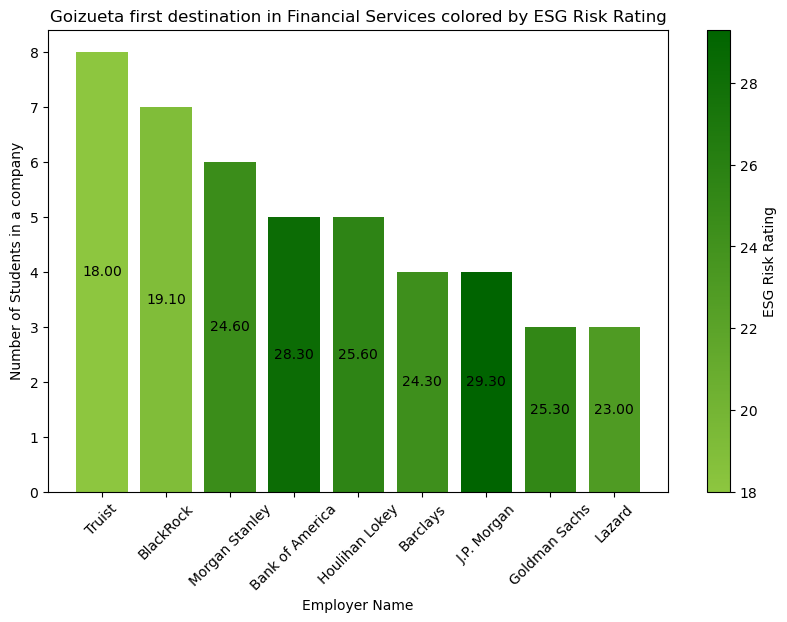

In [12]:
plt.figure(figsize=(10, 6))

# Normalize the 'ESG Score' values to map them to the custom green colormap
norm = Normalize(vmin=min(for_score['ESG Rating']), vmax=max(for_score['ESG Rating']))

# Define a custom green colormap transitioning from light green to dark green
green_cmap = mcolors.LinearSegmentedColormap.from_list('custom_green', ['#8DC63F', '#006400'])

# Create a bar graph with colored bars based on normalized 'ESG Score' and the custom green colormap
bars = plt.bar(for_score['Employer Name'], for_score['Value Counts'], color=green_cmap(norm(for_score['ESG Rating'])))

# Add labels to each bar with the corresponding 'ESG Score' value
for bar, esg_score in zip(bars, for_score['ESG Rating']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{esg_score:.2f}', ha='center', va='center')

# Add a color bar to indicate 'ESG Score' values (with green color)
sm = ScalarMappable(cmap=green_cmap, norm=norm)
sm.set_array([])  # Required to create a colorbar
cbar = plt.colorbar(sm, orientation='vertical', label='ESG Risk Rating')

# Add labels and title
plt.xlabel('Employer Name')
plt.ylabel('Number of Students in a company')
plt.title('Goizueta first destination in Financial Services colored by ESG Risk Rating')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

Furthermore, in order to foster a stronger connection between "business and society," it's crucial for Goizueta to not only report the number of placements but also to incorporate metrics for Environmental, Social, and Governance (ESG) reporting. This added dimension of measurement is essential for promoting a more holistic understanding of the impact of business activities on society and the environment.